In [1]:
import h5py    
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
# Create a custom legend
import matplotlib.patches as mpatches
import pandas as pd
plt.rc('text', usetex=True)

In [2]:
color_layer= ['#1BE7FF','#60992D','#60992D', '#FED766','#FED766','#D76A03', '#D76A03','#922D50','#922D50','#B0A3D4','#B0A3D4']
color_exc = 'red'
color_inh = 'tab:blue'

In [3]:
# Read Data collected for Figure1 about microcircuit 
# Data Folder can be downloaded from 10.5281/zenodo.14187063
# To reproduce this data use Code4DataExtraction/Data4Figure1.ipynb
df = pd.read_csv('./Data/fig1_circuit_composition.csv')

In [4]:
number_neurons = len(df.ids)
number_astro = 85

In [5]:
count_exc = (df['synapse_class'] == 'EXC').sum()
count_inh = (df['synapse_class'] == 'INH').sum()
print(count_exc, count_inh)

24368 3594


In [6]:
# Taken from Code4DataExtraction/Data4Figure1.ipynb
data_2 = [1.326800658035906,
 12.938988627422932,
 2.667906444460339,
 16.915814319433515,
 1.7380730992060653,
 20.538588083828053,
 1.4162077104642015,
 24.629854802946856,
 4.101995565410199,
 12.123596309276875,
 1.6021743795150563]

/nvme/sfarina/2701593/ipykernel_108590/392851348.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Excitatory', 'Inhibitory'], rotation=45, ha='right',fontsize=12)


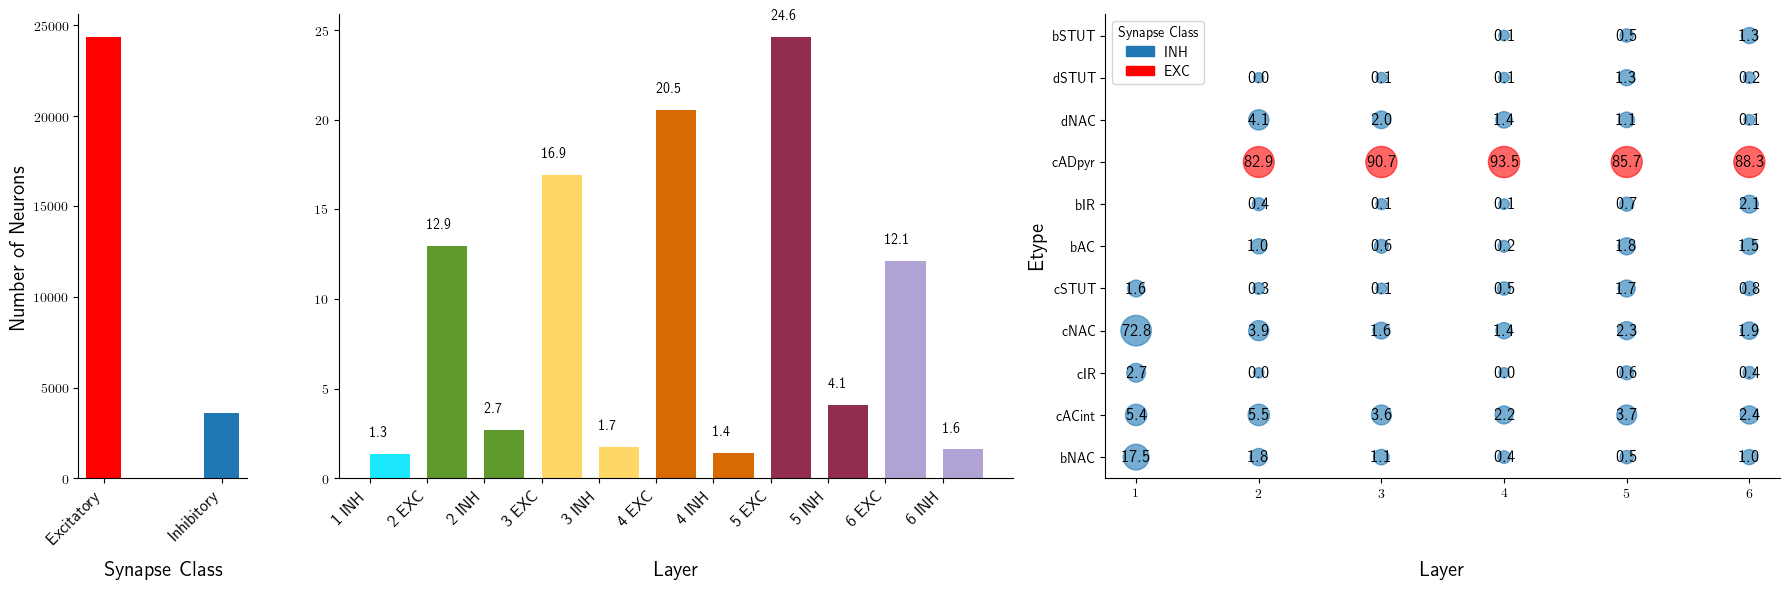

In [7]:
width = 0.7
# Define figure and subplots with different width ratios
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), 
                                    gridspec_kw={'width_ratios': [1, 4, 4]})  # ax1 is narrower, ax2 and ax3 are wider

# First subplot: Histogram for the number of neurons and astrocytes
ax1.bar(['Excitatory', 'Inhibitory'], 
        [count_exc, count_inh], width=0.3, color=[color_exc, color_inh])
ax1.set_ylabel('Number of Neurons', fontsize=15)
ax1.set_xlabel('Synapse Class', fontsize=15, labelpad=10)  # Add labelpad for alignment

# Remove top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
# Tilt the x-axis labels
ax1.set_xticklabels(['Excitatory', 'Inhibitory'], rotation=45, ha='right',fontsize=12)

# Second subplot: Histogram of the number of cells per layer
x = np.arange(len(data_2))
ax2.bar(x + width / 2, data_2, width, color=color_layer)

# Add percentage labels to the bars
float2 = [f'{data_2[i]:.1f}%' for i in range(len(data_2))]
for i in range(len(x)):
    ax2.text(x[i], data_2[i] + 1, float2[i])

ax2.set_xticks(x)
ax2.set_xticklabels(['1 INH',  '2 EXC','2 INH', '3 EXC', '3 INH', '4 EXC', '4 INH', '5 EXC', '5 INH', '6 EXC','6 INH'], 
                    rotation=45, ha='right', fontsize=12)
ax2.set_xlabel('Layer', fontsize=15, labelpad=10)  # Add labelpad for alignment

# Remove top and right spines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Third subplot: Bubble plot for composition by layer and etype
composition = df.groupby(['layer', 'etype', 'synapse_class']).size().reset_index(name='count')
total_counts = composition.groupby('layer')['count'].transform('sum')
composition['percentage'] = (composition['count'] / total_counts) * 100

# Apply logarithmic scaling to sizes based on percentage
min_size = 50  # Minimum bubble size for visibility
composition['size'] = np.log1p(composition['percentage']) * 100 + min_size

# Create a color map for synapse classes
synapse_colors = {
    'INH': color_inh,
    'EXC': color_exc,
}
composition['color'] = composition['synapse_class'].map(synapse_colors)

# Create the bubble plot on ax3
ax3.scatter(composition['layer'], composition['etype'], s=composition['size'], 
            alpha=0.6, c=composition['color'], edgecolor=composition['color'])

# Add annotations for percentages
for i in range(composition.shape[0]):
    ax3.text(composition['layer'][i], composition['etype'][i], f"{composition['percentage'][i]:.1f}%", 
             fontsize=12, ha='center', va='center')

# Customize the bubble plot
ax3.set_xlabel('Layer', fontsize=15, labelpad=10)  # Add labelpad for alignment
ax3.set_ylabel('Etype', fontsize=15)

# Remove right and top spines
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# Create a custom legend for the bubble plot
handles = [mpatches.Patch(color=color, label=synapse_class) for synapse_class, color in synapse_colors.items()]
ax3.legend(handles=handles, title='Synapse Class', loc='upper left')
fig.align_xlabels((ax1, ax2, ax3))

# Adjust layout to make the plots fit well
plt.tight_layout()
# plt.savefig("./RESULTS/Figure1_.pdf", format="pdf", dpi=1200, bbox_inches='tight')